# *Feature-Group Grated Fusion Architecture( FG-GFA)*

by Rohit Tamidapati, December 18th. 

# Introduction

As in life, in order to navigate through it we require several different sets of information to determine the best possible action for one to take, Sensor Fusion is one such significant technology for an autonomous system to respond/react to its surroundings to accomplish a certain or multiple tasks.<br>
<br>
Reducing uncertainty is one of the most important motives behind any kind of learning. Sensor Fusion is an amalgamation of several sensors of a system to reduce the uncertainty of action, and this is done so through various deep learning architectures that have been designed so far and one such architecture this report analysis is "Feature-Group Gated Fusion Architecture (FG-GFA)" as proposed in the following paper:  <br>
*Optimized Gated Deep Learning Architectures for Sensor Fusion. - Myung Seok Shim, Peng Li* [1]
<br>
<br>
We compare this FG-GFA architecture with Net-Gated Architecture to show that the prediction ability of FG-GFA is better than that of Net-Gated Architecture, this Net-Gated Architecture was first proposed in the following paper: <br>
*Naman Patel, Anna Choromanska, Prashanth Krishnamurthy, and Farshad Khorrami. Sensor modality fusion with CNN's for ugv autonomous driving in indoor environments.  In International Conference on Intelligent Robots and Systems (IROS). IEEE, 2017.*[2]<br>
<br>
• FG-GFA is a coarser-grained architecture with feature-level fusion weights that helps to address the inconsistencies of fusion weights and potential over-fitting that was shown to be present in Net-Gated Architecture.<br>
<br>
• The result in comparison is that FG-GFA shows a better prediction of around one percent increase compared to the Net-Gated Architecture.

# Architectures and their design

## The NetGated Architecture

A generalized description of the architure is as follows:<br>
<br>
The first step involved is passing the several features individually through series of layers, convolutional layer, followed by pooling layer and then through fully connected layer; the outputs of these series of layers are then concatenated and then fused by another fully connected layer, which generates respective feature-level fusion weights.<br>
<br>
These fusion weights were originally called scalars in, <br> *Naman Patel, Anna Choromanska, Prashanth Krishnamurthy, and Farshad Khorrami. Sensor modality fusion with CNN's for ugv autonomous driving in indoor environments. In International Conference on Intelligent Robots and Systems (IROS). IEEE, 2017.* [2]<br>
<br>
These extracted feature-level weights in the netgated architecture might be thought of as "gated" variables for each such feature input.<br> These sensor inputs are allowed to be shut off from the network by initializing their respective feature-weights to be zero-valued, which is a required attribute to show the robustness of the architecture.

### Limitations of the Basic Netgated Architecture

#### Inconsistency of Weights:<br>
The feature-level fusion weights are in the end generated by the Fully connected layer after concatenation of previous individual fully connected layers. This might result in extracted fusion weights to not entirely correcpond to the corresponding feature because of the information sharing among all features.<br>
<br>
It must be understood that there is an existence of cases where features with the largest fusion weight might not represent the critical feature of the learning task.<br>
This means that although feature weights can be ranked to reflect the relative importance to a certain degree of the corresponding features, the association is not always consistent.<br>
<br>

#### Over-fitting <br>
And also, for applications with a lot of features are to be fused, using the same number of fusion weight values introduces many additional parameters that should be learned properly during the training process, raising the possibility of over-fitting of the model to occur. Furthermore, this situation worsens due to the potential occurrence of the inconsistency of fusion weights.

## FG-GFA

FG-GFA is a coarser-grained architecture.<br>
What does it mean to be coarser-grained architecture?<br>
• Firstly, granularity means it is the extent to which a system is broken down into small parts, either the system itself or its description or observation. It is the extent to which a larger entity is subdivided. For example, a yard broken into inches has finer granularity than a yard broken into feet.[https://en.wikipedia.org/wiki/Granularity].<br>
• Coarse-grained: larger components than fine-grained, large subcomponents. It wraps one or more fine-grained services together into a more coarse-grained operation.<br>
<br>
A generalized description of FG-GFA:<br>

For a gien set of N input features f1, f2, ..., fn, they may be partioned into M feature groups namely, FG1, FG2, ..., FGm.<br>
 All feature groups are concatenated first and then passed onto the convolutional layer and then a pooling layer( we might choose to first pass the convolved output through an 'over-fitting layer' which might eliminate a possible over-fitting problem), and then passed onto a Fully Connected layer, whose outputs are divided into M group-level fusion weights. All weighted group-level information is combined and then processed by the final Fully Connected layer. ( Before that the outputs of FC-layers of group-level weights are multiplied to the corresponding group-level fusion weights).<br>
As mention in- *Optimized Gated Deep Learning Architectures for Sensor Fusion. - Myung Seok Shim, Peng Li* [1]

### Advantages of FG-GFA <br>
<br>
Firstly, in addition to the final fusion operation of the final fully connected layer, and additional early fusion of sensory inputs within each group is performed.<br>
 The outputs of such fusions generated within the group are combined to produce a smaller number of group-level fusion weights. The extracted group level weights are then used to multiply the corresponding fused group feature information and not the individual feature information.<br>
 Since the fusion weights are extracted only at the group-level, a fewer number of weights are learned compared to net-gated architecture. This is beneficial so, because early fusion at the group-level reduces the likelihood of the training process to be stuck at the local-minima, which helps in reducing the "inconsistencies of fusion weights and potential over-fitting"

FG-GFA is also more robust than Netgated Architecture.

# Data Set

### Dataset for Human Activity Recognition.

The dataset for Human activity recognition using smartphones was obtained from the UCI repository:<br>
https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones. <br>
#### The deatils of the Dataset:<br>
<br>
The six activities performed were as follows:<br>


   • Walking<br>
   • Walking Upstairs<br>
   • Walking Downstairs<br>
   • Sitting<br>
   • Standing<br>
   • Laying<br>

The movement data recorded was the x, y, and z accelerometer data and gyroscopic data from the smart phone, specifically a Samsung Galaxy S II. Observations were recorded at 50 Hz (i.e. 50 data points per second). Each subject performed the sequence of activities twice, once with the device on their left-hand-side and once with the device on their right-hand side.

The raw data is not available. Instead, a pre-processed version of the dataset was made available. The pre-processing steps included:<br>


   • Pre-processing accelerometer and gyroscope using noise filters.<br>
   • Splitting data into fixed windows of 2.56 seconds (128 data points) with 50% overlap.<br>
   • Splitting of accelerometer data into gravitational (total) and body motion components.<br>

Feature engineering was applied to the window data, and a copy of the data with these engineered features was made available.

A number of time and frequency features commonly used in the field of human activity recognition were extracted from each window. The result was a 561 element vector of features.

The dataset was split into train (70%) and test (30%) sets based on data for subjects, e.g. 21 subjects for train and nine for test.

# Methods

#### Resources
*Adopted Tool:* <br>
Keras neural-network library with TensorFlow running at the backend.<br>
<br>
*Online Resources:* <br>
•https://machinelearningmastery.com/how-to-develop-multilayer-perceptron-models-for-time-series-forecasting/
<br>
•https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/ 
<br>
•https://machinelearningmastery.com/timedistributed-layer-for-long-short-term-memory-networks-in-python/
<br>
•https://machinelearningmastery.com/how-to-improve-deep-learning-model-robustness-by-adding-noise/
<br>
•https://keras.io/
<br>
•https://datascience.stackexchange.com/questions/39407/how-to-make-two-parallel-convolutional-neural-networks-in-keras
<br>
•https://en.wikipedia.org/wiki/Time_series

#### Steps 
Firstly, the code was designed to test the prediction of a general CNN, with all input passed through a convolutional layer, then pooling and then flattening and finally a fully connected layer. <br>
Secondly, Netgated architecture was designed to check the prediction percentage of the input.<br>
Thirdly, FG-GFA was designed to check the prediction percentage.<br>
Lastly, All the percentages are compared together.


# Code

In [1]:
import numpy as np
import tensorflow.keras.backend as tf
from numpy import array
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import StandardScaler
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.models import Model
from keras.layers import Input, GaussianNoise, concatenate
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical


Using TensorFlow backend.


#### Loading Data Set

In [2]:
# load a single file as a numpy array
def load_file(filepath):
	dataframe = read_csv(filepath, header=None, delim_whitespace=True)
	return dataframe.values
 
# load a list of files and return as a 3d numpy array
def load_group(filenames, prefix='/media/tro23/Rohit/CS545/'):
	loaded = list()
	for name in filenames:
		data = load_file(prefix + name)
		loaded.append(data)
	# stack group so that features are the 3rd dimension
	loaded = dstack(loaded)
	return loaded
 
# load a dataset group, such as train or test
def load_dataset_group(group, prefix='/media/tro23/Rohit/CS545/'):
	filepath = prefix + group + '/Inertial Signals/'
	# load all 9 files as a single array
	filenames = list()
	# total acceleration
	filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
	# body acceleration
	filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
	# body gyroscope
	filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
	# load input data
	X = load_group(filenames, filepath)
	# load class output
	y = load_file(prefix + group + '/y_'+group+'.txt')
	return X, y
 
# load the dataset, returns train and test X and y elements
def load_dataset(prefix='/media/tro23/Rohit/CS545/'):
	# load all train
	trainX, trainy = load_dataset_group('train', prefix + 'HARDataset/')
	print(trainX.shape, trainy.shape)
	# load all test
	testX, testy = load_dataset_group('test', prefix + 'HARDataset/')
	print(testX.shape, testy.shape)
	# zero-offset class values
	trainy = trainy - 1
	testy = testy - 1
	# one hot encode y
	trainy = to_categorical(trainy)
	testy = to_categorical(testy)
	print(trainX.shape, trainy.shape, testX.shape, testy.shape)
	return trainX, trainy, testX, testy
 

#### Standardising Data

In [3]:
def scale_data(trainX, testX, standardize):
	# remove overlap
	cut = int(trainX.shape[1] / 2)
	longX = trainX[:, -cut:, :]
	# flatten windows
	longX = longX.reshape((longX.shape[0] * longX.shape[1], longX.shape[2]))
	# flatten train and test
	flatTrainX = trainX.reshape((trainX.shape[0] * trainX.shape[1], trainX.shape[2]))
	flatTestX = testX.reshape((testX.shape[0] * testX.shape[1], testX.shape[2]))
	# standardize
	if standardize:
		s = StandardScaler()
		# fit on training data
		s.fit(longX)
		# apply to training and test data
		longX = s.transform(longX)
		flatTrainX = s.transform(flatTrainX)
		flatTestX = s.transform(flatTestX)
	# reshape
	flatTrainX = flatTrainX.reshape((trainX.shape))
	flatTestX = flatTestX.reshape((testX.shape))
	return flatTrainX, flatTestX

### General CNN for time Series

In [4]:
# fit and evaluate a model
def evaluate_model(trainX, trainy, testX, testy):
	verbose, epochs, batch_size = 0, 10, 32
	n_timesteps, n_features, n_outputs = trainX.shape[1], trainX.shape[2], trainy.shape[1]
	model = Sequential()
	model.add(Conv1D(filters=64, kernel_size=7, activation='relu', input_shape=(n_timesteps,n_features)))
	model.add(Conv1D(filters=64, kernel_size=7, activation='relu'))
	model.add(Dropout(0.5))
	model.add(MaxPooling1D(pool_size=2))
	model.add(Flatten())
	model.add(Dense(100, activation='relu'))
	model.add(Dense(n_outputs, activation='softmax'))
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	model.fit(trainX, trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
	_, accuracy = model.evaluate(testX, testy, batch_size=batch_size, verbose=0)
	return accuracy
 
# summarize scores
def summarize_results(scores):
	print(scores)
	m, s = mean(scores), std(scores)
	print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))
 
# run an experiment
def run_experiment(repeats=5):
	# load data
	trainX, trainy, testX, testy = load_dataset()
	# repeat experiment
	scores = list()
	for r in range(repeats):
		score = evaluate_model(trainX, trainy, testX, testy)
		score = score * 100.0
		print('>#%d: %.3f' % (r+1, score))
		scores.append(score)
	# summarize results
	summarize_results(scores)
 
# run the experiment
run_experiment()

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)
>#1: 90.838
>#2: 92.671
>#3: 90.940
>#4: 90.668
>#5: 91.958
[90.83814024925232, 92.67051219940186, 90.93993902206421, 90.66847562789917, 91.95792078971863]
Accuracy: 91.415% (+/-0.773)


### NetGated CNN

In [15]:
def evaluate_model_1(trainX, trainy, testX, testy):
	verbose, epochs, batch_size = 0, 10, 32
	n_timesteps, n_features, n_outputs = trainX[:,:,0:3].shape[1], trainX[:,:,0:3].shape[2], trainy.shape[1]
 	# head 1
	inputs1 = Input(shape=(n_timesteps,n_features))
	conv1 = Conv1D(filters=64, kernel_size=7, activation='relu')(inputs1)

	pool1 = MaxPooling1D(pool_size=2)(conv1)
	flat1 = Flatten()(pool1)
	dense1 = Dense(100, activation='relu')(flat1)
	# head 2
	inputs2 = Input(shape=(n_timesteps,n_features))
	conv2 = Conv1D(filters=64, kernel_size=7, activation='relu')(inputs2)

	pool2 = MaxPooling1D(pool_size=2)(conv2)
	flat2 = Flatten()(pool2)
	dense2 = Dense(100, activation='relu')(flat2)
	# head 3
	inputs3 = Input(shape=(n_timesteps,n_features))
	conv3 = Conv1D(filters=64, kernel_size=7, activation='relu')(inputs3)

	pool3 = MaxPooling1D(pool_size=2)(conv3)
	flat3 = Flatten()(pool3)
	dense3 = Dense(100, activation='relu')(flat3)
	# merge
	merged = concatenate([flat1, flat2, flat3])
	# interpretation
	outputs = Dense(n_outputs, activation='softmax')(merged)
	model = Model(inputs=[inputs1, inputs2, inputs3], outputs=outputs)
	model
    # save a plot of the model
	plot_model(model, show_shapes=True, to_file='/media/tro23/Rohit/CS545/Netgated.png')
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	model.fit([trainX[:,:,0:3],trainX[:,:,3:6],trainX[:,:,6:9]], trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
	_, accuracy = model.evaluate([trainX[:,:,0:3],trainX[:,:,3:6],trainX[:,:,6:9]], trainy, batch_size=batch_size, verbose=0)
	return accuracy
 


 
# run an experiment
def run_experiment_1(repeats=5):
	# load data
	trainX, trainy, testX, testy = load_dataset()
	# repeat experiment
	scores = list()
	for r in range(repeats):
		score = evaluate_model_1(trainX, trainy, testX, testy)
		score = score * 100.0
		print('>#%d: %.3f' % (r+1, score))
		scores.append(score)
	# summarize results
	summarize_results(scores)
 
# run the experiment
run_experiment_1()

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)
>#1: 96.804
>#2: 97.157
>#3: 97.280
>#4: 97.116
>#5: 96.654
[96.80359363555908, 97.15723395347595, 97.27964997291565, 97.11642861366272, 96.6539740562439]
Accuracy: 97.002% (+/-0.234)


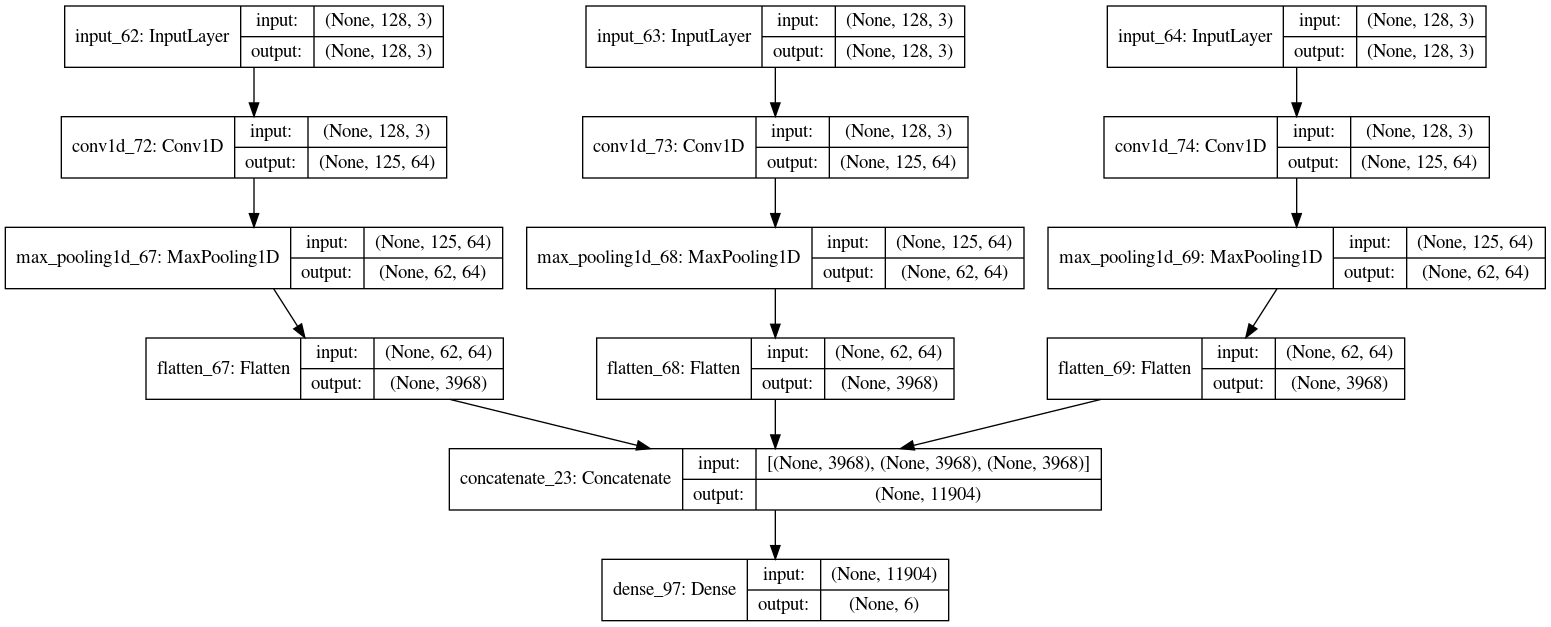

*Figure: NetGated Architecture*

### FG-GFA

In [17]:
def evaluate_model_2(trainX, trainy, testX, testy):
	verbose, epochs, batch_size = 0, 10, 32
	n_timesteps, n_features, n_outputs = trainX[:,:,0:6].shape[1], trainX[:,:,0:6].shape[2], trainy.shape[1]
	n_timesteps_2, n_features_2 = trainX[:,:,6:9].shape[1], trainX[:,:,6:9].shape[2]
    # head 1
	inputs1 = Input(shape=(n_timesteps,n_features))

	conv1 = Conv1D(filters=64, kernel_size=7, activation='relu')(inputs1)
	drop1 = Dropout(0.5)(conv1)
	pool1 = MaxPooling1D(pool_size=2)(drop1)
	flat1 = Flatten()(pool1)
	dense1= Dense(100, activation='relu')(flat1)
	# head 2
	inputs2 = Input(shape=(n_timesteps_2,n_features_2))

	conv2 = Conv1D(filters=64, kernel_size=7, activation='relu')(inputs2)
	drop2 = Dropout(0.5)(conv2)
	pool2 = MaxPooling1D(pool_size=2)(drop2)
	flat2 = Flatten()(pool2)
	dense2 = Dense(100, activation='relu')(flat2)
	# merge
	merge_dense = concatenate([dense1,dense2])
	# interpretation
	outputs = Dense(n_outputs, activation='softmax')(merge_dense)
	model = Model(inputs=[inputs1, inputs2], outputs=outputs)


	# save a plot of the model
	plot_model(model, show_shapes=True, to_file='/media/tro23/Rohit/CS545/FG_GFA.png')
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	# fit network
	model.fit([trainX[:,:,0:6],trainX[:,:,6:9]], trainy, epochs=epochs, batch_size=batch_size, verbose=verbose)
	# evaluate model
	_, accuracy = model.evaluate([trainX[:,:,0:6],trainX[:,:,6:9]], trainy, batch_size=batch_size, verbose=0)
	return accuracy
 
 
# run an experiment
def run_experiment_2(repeats=5):
	# load data
	trainX, trainy, testX, testy = load_dataset()
	# repeat experiment
	scores = list()
	for r in range(repeats):
		score = evaluate_model_2(trainX, trainy, testX, testy)
		score = score * 100.0
		print('>#%d: %.3f' % (r+1, score))
		scores.append(score)
	# summarize results
	summarize_results(scores)
 
# run the experiment
run_experiment_2()

(7352, 128, 9) (7352, 1)
(2947, 128, 9) (2947, 1)
(7352, 128, 9) (7352, 6) (2947, 128, 9) (2947, 6)
>#1: 98.708
>#2: 97.388
>#3: 98.191
>#4: 98.531
>#5: 97.497
[98.70783686637878, 97.3884642124176, 98.1909692287445, 98.53101372718811, 97.49727845191956]
Accuracy: 98.063% (+/-0.534)


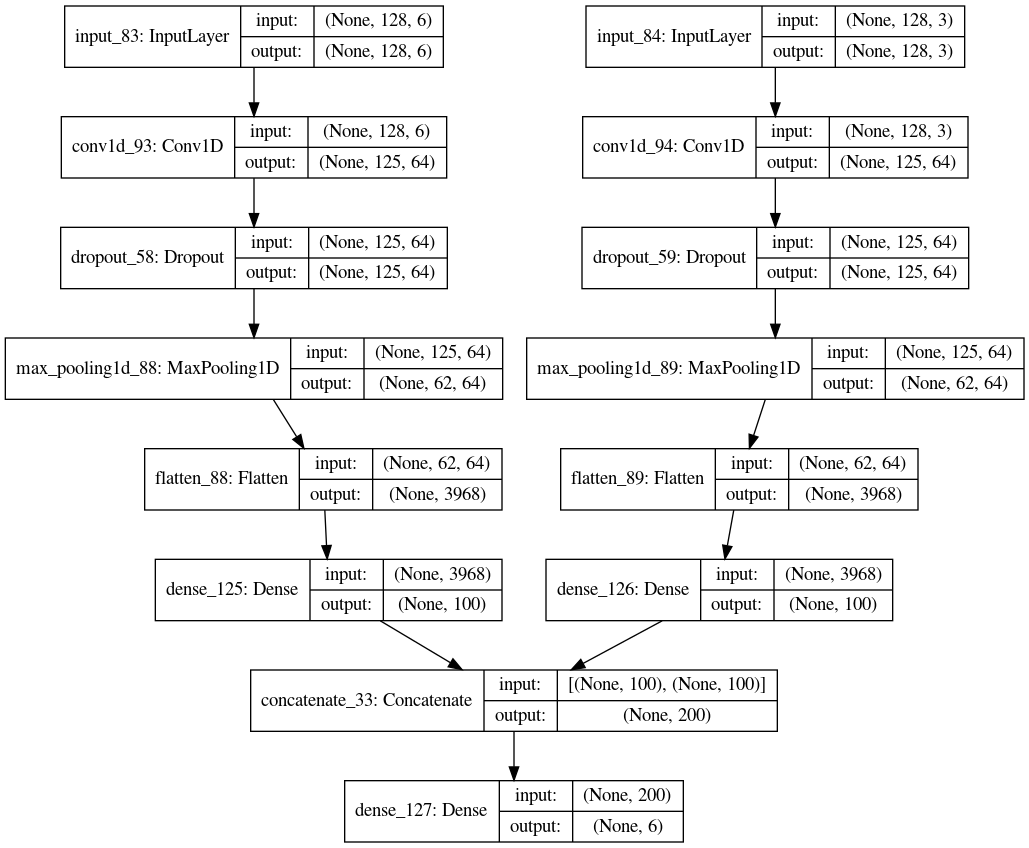

*Figure: FG-GFA*

# Results

Initially, we have to note that the data being used is a time series, and the time series neural network is a stochastic process that doesn't always produce the exact result because of its very nature.<br>
To reduce the such affect or rather find an 'average' accuracy, We can repeat the evaluation of the model multiple times, then summarize the performance of the model across each of those runs. This will result in a population of model evaluation scores that must be summarized.
<br>
We observe that when we perform the general CNN on the data, the accuracy is around 90-91%. <br>
When we perform the Netgated architecture we observe that the accuracy is around 96-97%, which is a significant increase than the general CNN, which shows that this particular architecture is very well designed.<br>
Now, when we perform the FG-GFA architecture we observe that the accuracy is around 97-98% which as observed in the paper, *Optimized Gated Deep Learning Architectures For Sensor Fusion*[1], there is an increase in 1% of accuracy. Which is quite telling. <br>  
Now coming to the variance generated by the three architectures, it was found that NetGated architecture had a better low variance that the other two.<br>
Kernel Size for the 1-dimensional Convolution: When testing for the kernel size, the kernel size of 7 produced an acceptable accuracy and a better low variance, indicating a good balance between them.<br>

## Conclusion 

##### What I learnt. <br>
Distribution of weights among the features themselves instead of a whole large network of inputs together results in a better accuracy, as I suppose because when the weights are updated, the grouped weights tend to change relatively together. <br>
This makes it easier for the neural-network to backtrack to a certain feature without being mislead to another feature which might end up generating the same weights if the whole input of features is predicted at once.<br>
'Relu' activation function is a better performer than 'tanh' in cases involved with time series unlike MNIST data set that was implemented in the class. It also helps in accelerating the convergence.<br>
NetGated Architecture has a significant increase in accuracy when compared to the general CNN and FG-GFA has an even better accuracy compared to NetGated Architecture.<br>
<br>
##### Difficulty in:  <br>
Implementing the architectures. And it was even more so, because had to spend time to learn Keras library, since, the help found on the internet were mostly in keras I had to spend a significant time to get used to it and understand its process of working.<br>
Reading multiple papers to understand why exactly such architectures were designed, it was a positive learning curve.<br>
<br>
##### Changes to timeline:<br>
Quite a plenty,<br>
I Spent almost a month trying out the keras library and spent a couple of weeks reading the papers associated with the project.

# References 

[1]Optimized Gated Deep Learning Architectures for Sensor Fusion. - Myung Seok Shim, Peng Li <br>
[2]Naman Patel, Anna Choromanska, Prashanth Krishnamurthy, and Farshad Khorrami. Sensor modality fusion with CNN's for ugv autonomous driving in indoor environments. In International Conference on Intelligent Robots and Systems (IROS). IEEE, 2017. <br>
[3]https://machinelearningmastery.com/how-to-develop-multilayer-perceptron-models-for-time-series-forecasting/ <br>
[4]https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/ <br>
[5] https://machinelearningmastery.com/timedistributed-layer-for-long-short-term-memory-networks-in-python/<br>
[6]https://machinelearningmastery.com/how-to-improve-deep-learning-model-robustness-by-adding-noise/ <br>
[7]https://keras.io/ <br>
[8]https://datascience.stackexchange.com/questions/39407/how-to-make-two-parallel-convolutional-neural-networks-in-keras <br>
[9]https://en.wikipedia.org/wiki/Time_series <br>
[10] Time Series: Theory and Methods by Peter J. Brockwell,Richard A. Davis<br>
[11]Ashesh Jain, Hema S Koppula, Shane Soh, Bharad Raghavan, Avi Singh, and Ashutosh Saxena.Brain4cars:  Car that knows before you do via sensory-fusion deep learning architecture.arXivpreprint arXiv:1601.00740, 2016. <br>
[12]Aras Yurtman and Billur Barshan. Activity recognition invariant to sensor orientation with wearablemotion sensors.Sensors, 17(8):1838, 2017. <br>
[13]Davide Anguita, Alessandro Ghio, Luca Oneto, Xavier Parra, and Jorge Luis Reyes-Ortiz. A publicdomain dataset for human activity recognition using smartphones. InESANN, 2013. <br>
[14]https://nbviewer.jupyter.org/url/www.cs.colostate.edu/~anderson/cs545/notebooks/A4.4%20Convolutional%20Neural%20Networks.ipynb <br>
[15]https://keras.io/getting-started/functional-api-guide/#multi-input-and-multi-output-models <br>